<a href="https://colab.research.google.com/github/ZahraAreefaAnanta/IF4021/blob/master/121140138_ho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Zahra Areefa Ananta**

**NIM: 121140138**

**NOMOR 1**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Gunakan cv2.resize untuk mengubah ukuran foto menjadi 1080 pada dimensi terpanjang.

In [2]:
# Load the image
image = cv2.imread('/content/foto jeje.jpg')

# Get dimensions of the original image
(h, w) = image.shape[:2]

# Calculate the scaling factor
scale_factor = 1080.0 / max(w, h)

# Resize the image
image_resized = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_AREA)


Kita akan menambahkan frame sebesar 25 pixel + 38 (NIM saya) pada setiap sisi dengan warna kuning.

In [3]:
# Define frame size (25 + 38 pixels)
frame_thickness = 25 + 38

# Add a yellow frame (255, 255, 0 in BGR)
image_with_frame = cv2.copyMakeBorder(
    image_resized,
    frame_thickness, frame_thickness,
    frame_thickness, frame_thickness,
    cv2.BORDER_CONSTANT,
    value=(0, 255, 255)
)


Atur intensitas warna:

- Channel merah (R) di bagian tengah (50 - 150): Naikkan intensitas sebesar 20 poin.

- Channel biru (B) di atas (200 - 250): Turunkan intensitas sebesar 20 poin.

In [4]:
# Copy the image for processing color intensities
image_processed = image_with_frame.copy()

# Increase Red channel intensity between 50-150 by 20 points
mask_red = (image_processed[:,:,2] >= 50) & (image_processed[:,:,2] <= 150)
image_processed[:,:,2][mask_red] = np.clip(image_processed[:,:,2][mask_red] + 20, 0, 255)

# Decrease Blue channel intensity above 200 by 20 points
mask_blue = image_processed[:,:,0] >= 200
image_processed[:,:,0][mask_blue] = np.clip(image_processed[:,:,0][mask_blue] - 20, 0, 255)


Histogram akan menunjukkan distribusi intensitas warna untuk setiap channel (BGR).

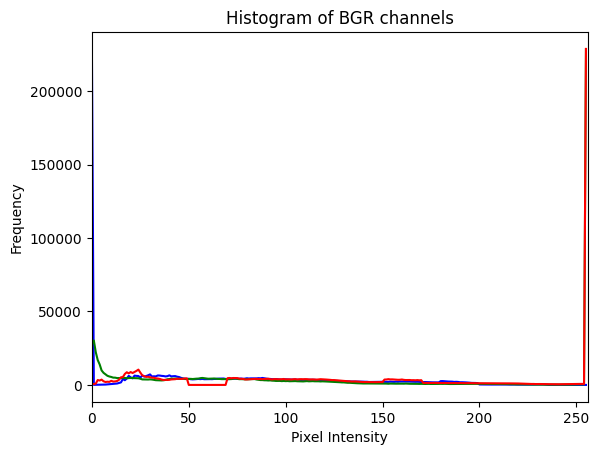

In [5]:
# Function to plot the histogram
def plot_histogram(image):
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.title("Histogram of BGR channels")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Plot the histogram
plot_histogram(image_processed)


Terakhir, kita bisa menampilkan gambar hasil eksperimen.

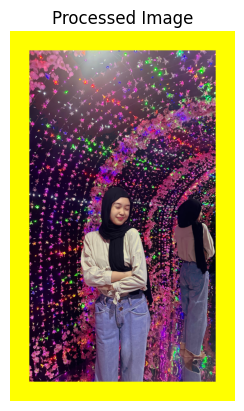

In [6]:
# Convert image to RGB for display in matplotlib
image_display = cv2.cvtColor(image_processed, cv2.COLOR_BGR2RGB)

# Show the image
plt.imshow(image_display)
plt.title('Processed Image')
plt.axis('off')
plt.show()


Penjelasan Hasil Eksperimen:

1. Resize: Ukuran gambar telah diubah sehingga sisi terpanjangnya adalah 1080, menjaga aspek rasio agar gambar tidak terdistorsi.

2. Frame kuning: Gambar dikelilingi oleh frame kuning (warna kuning di OpenCV ditulis sebagai (0, 255, 255) karena OpenCV menggunakan format BGR).

3. Intensitas warna merah: Intensitas warna merah pada area yang berkisar antara 50-150 pada gambar telah ditingkatkan sebesar 20 poin. Hal ini membuat area tersebut tampak lebih merah dibanding sebelumnya.

4. Intensitas warna biru: Pada area dengan nilai intensitas biru lebih dari 200, intensitasnya dikurangi 20 poin, membuat area tersebut tampak lebih gelap dalam channel biru.

5. Histogram: Grafik histogram menunjukkan distribusi intensitas pixel pada masing-masing channel warna (B, G, R). Setelah proses ini, histogram menunjukkan peningkatan intensitas pada channel merah di kisaran 50-150 dan penurunan pada intensitas biru di atas 200.

**NOMOR 2**

Pada langkah pertama, kita akan mengonversi gambar dari format warna (RGB) menjadi grayscale. Pada gambar grayscale, setiap piksel hanya memiliki satu nilai intensitas yang mewakili kecerahannya, dibandingkan dengan tiga channel warna (merah, hijau, biru) pada gambar berwarna.

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (replace 'your_photo.jpg' with your image path)
image = cv2.imread('/content/foto jeje.jpg')

# Convert the image from RGB to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


Histogram memberikan distribusi intensitas pixel pada gambar grayscale. Ini membantu melihat seberapa gelap atau terang gambar secara keseluruhan.

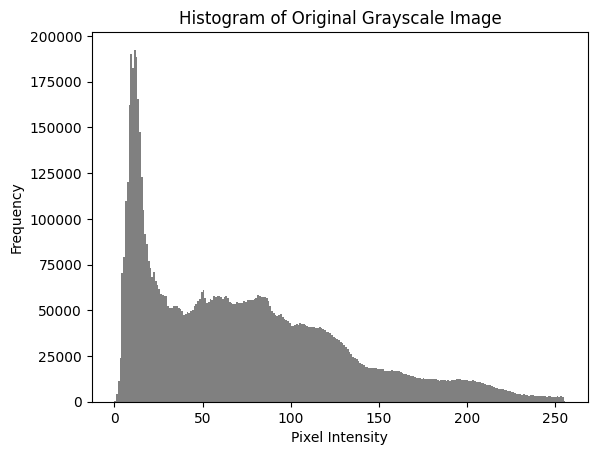

In [8]:
# Function to plot the histogram of an image
def plot_histogram(image, title="Histogram"):
    plt.figure()
    plt.hist(image.ravel(), bins=256, range=(0, 256), color='gray')
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Plot the histogram for the grayscale image
plot_histogram(gray_image, title="Histogram of Original Grayscale Image")


Normalisasi bertujuan merentangkan distribusi nilai intensitas dari gambar. Gambar asli mungkin memiliki intensitas piksel yang tersebar sempit (misalnya antara 50 hingga 200), dan normalisasi akan memperluasnya ke rentang penuh antara 0 hingga 255.

In [9]:
# Normalize the intensity levels so that the min value becomes 0 and the max becomes 255
norm_image = cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX)


Setelah normalisasi, kita bisa melihat bagaimana histogram gambar telah berubah, dengan nilai piksel yang tersebar lebih merata dari 0 hingga 255.

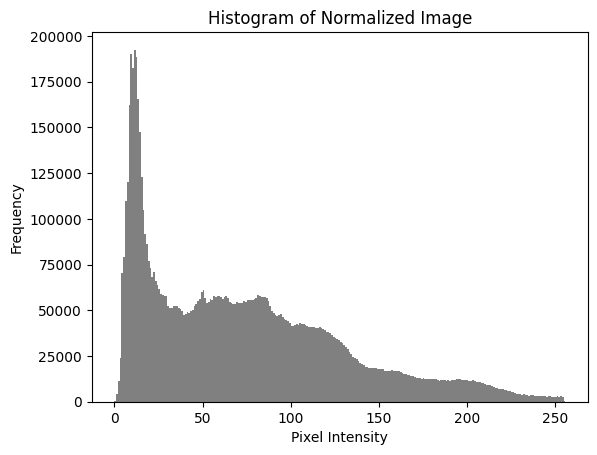

In [10]:
# Plot the histogram for the normalized image
plot_histogram(norm_image, title="Histogram of Normalized Image")


Pada langkah ini, kita mengubah gambar menjadi gaya pixel-art. Untuk membuat efek pixel-art, kita menggunakan thresholding, yaitu:

- Jika intensitas piksel lebih kecil dari 128, ubah menjadi 0 (hitam).

- Jika intensitas piksel lebih besar atau sama dengan 128, ubah menjadi 255 (putih).

In [11]:
# Apply thresholding to create pixel-art (binary image)
_, pixel_art_image = cv2.threshold(norm_image, 128, 255, cv2.THRESH_BINARY)


Menampilkan ketiga hasil gambar: gambar grayscale asli, gambar yang telah dinormalisasi, dan gambar dengan efek pixel-art.

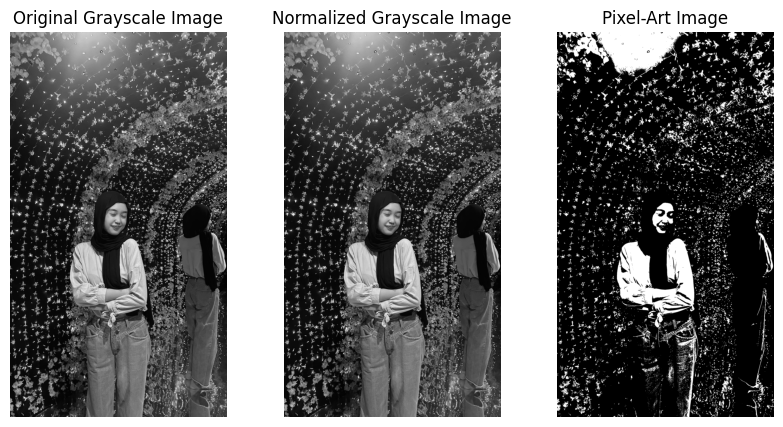

In [12]:
# Display the results using matplotlib
plt.figure(figsize=(10, 5))

# Original grayscale image
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Normalized grayscale image
plt.subplot(1, 3, 2)
plt.imshow(norm_image, cmap='gray')
plt.title('Normalized Grayscale Image')
plt.axis('off')

# Pixel-art image
plt.subplot(1, 3, 3)
plt.imshow(pixel_art_image, cmap='gray')
plt.title('Pixel-Art Image')
plt.axis('off')

plt.show()


**NOMOR 3**

Langkah 1: Menaikkan Kecerahan Menggunakan Operasi Matriks

Menaikkan kecerahan gambar berarti meningkatkan intensitas semua piksel secara merata. Kecerahan dapat dinaikkan dengan menambahkan nilai tertentu ke setiap piksel dalam gambar.

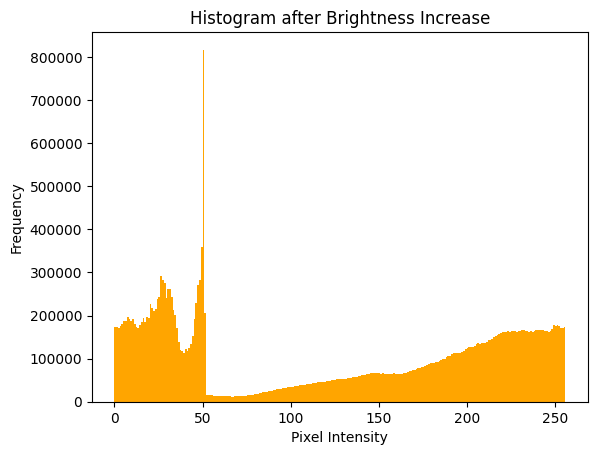

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image using matplotlib (replace 'your_photo.jpg' with your actual image path)
image = plt.imread('/content/foto jeje.jpg')

# Convert image to numpy array and make sure it's in the range [0, 255]
image = (image * 255).astype(np.uint8)

# Step 1: Increase brightness by adding a constant value
brightness_value = 50
bright_image = image + brightness_value

# Ensure pixel values stay within the valid range [0, 255]
bright_image = np.clip(bright_image, 0, 255)

# Display histogram of the brightened image
plt.hist(bright_image.ravel(), bins=256, range=(0, 256), color='orange')
plt.title('Histogram after Brightness Increase')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


Langkah 2: Menurunkan Saturasi Menggunakan Operasi Matriks

Menurunkan saturasi berarti mengurangi kepekatan warna, yang membawa gambar lebih dekat ke grayscale. Kita bisa mengurangi saturasi dengan menginterpolasi antara warna asli dan versi grayscale dari gambar.

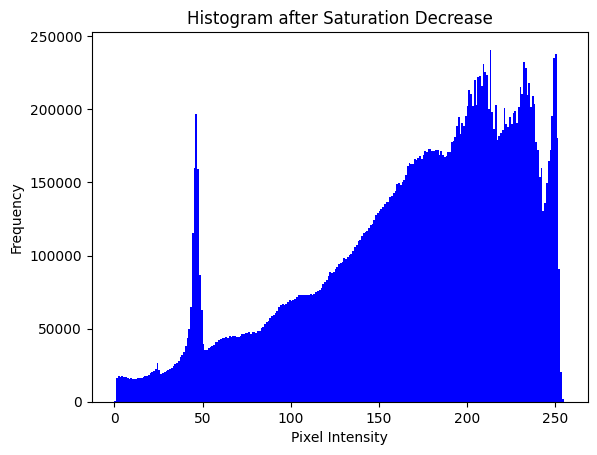

In [14]:
# Step 2: Decrease saturation
# Convert the image to grayscale by averaging the RGB channels
gray_image = np.mean(image, axis=2, keepdims=True)

# Interpolate between the original color image and the grayscale image to reduce saturation
saturation_level = 0.7  # 70% original, 30% grayscale
desaturated_image = image * saturation_level + gray_image * (1 - saturation_level)

# Ensure the pixel values are within the valid range [0, 255]
desaturated_image = np.clip(desaturated_image, 0, 255).astype(np.uint8)

# Display histogram of the desaturated image
plt.hist(desaturated_image.ravel(), bins=256, range=(0, 256), color='blue')
plt.title('Histogram after Saturation Decrease')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


Langkah 3: Menurunkan Kontras Menggunakan Operasi Matriks

Menurunkan kontras berarti mengurangi perbedaan antara area terang dan gelap dalam gambar. Ini bisa dilakukan dengan menghitung nilai tengah (mean) dari gambar dan kemudian memindahkan setiap piksel lebih dekat ke nilai tengah tersebut.

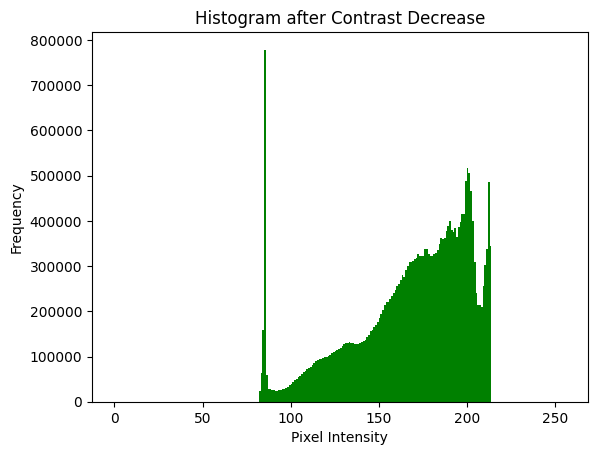

In [15]:
# Step 3: Decrease contrast
# Calculate the mean value of the image
mean_value = np.mean(image, axis=(0, 1), keepdims=True)

# Interpolate between the original image and the mean value to reduce contrast
contrast_level = 0.5  # 50% original contrast, 50% reduced contrast
low_contrast_image = image * contrast_level + mean_value * (1 - contrast_level)

# Ensure pixel values stay within the valid range [0, 255]
low_contrast_image = np.clip(low_contrast_image, 0, 255).astype(np.uint8)

# Display histogram of the low contrast image
plt.hist(low_contrast_image.ravel(), bins=256, range=(0, 256), color='green')
plt.title('Histogram after Contrast Decrease')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
